In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


In [2]:
df_vuelos = pd.read_csv('../files/Customer_Flight_Activity.csv')
df_vuelos.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_clientes = pd.read_csv('../files/Customer_Loyalty_History.csv')
df_clientes.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


EDA df_vuelos

In [4]:
df_vuelos.shape

(405624, 10)

In [5]:
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
df_vuelos['Points Accumulated'].value_counts() #hay valores float, no se puede convertir en int

Points Accumulated
0.00      197992
180.00       763
270.00       734
288.00       717
189.00       709
252.00       704
232.00       685
144.00       684
226.00       677
243.00       674
210.00       670
198.00       668
256.00       668
204.00       666
240.00       659
280.00       657
273.00       655
324.00       653
195.00       640
260.00       636
150.00       635
135.00       633
312.00       632
228.00       631
216.00       631
156.00       630
264.00       630
294.00       628
184.00       627
282.00       627
217.00       624
267.00       624
222.00       622
304.00       615
168.00       613
172.00       613
250.00       613
315.00       611
165.00       609
212.00       608
162.00       607
214.00       606
147.00       605
268.00       605
187.00       604
261.00       604
292.00       603
207.00       602
306.00       601
126.00       601
234.00       600
205.00       600
235.00       600
244.00       598
163.00       597
297.00       596
160.00       592
166.00      

In [8]:
df_vuelos.describe().T #no hay valores nulos

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


EDA df_clientes

In [16]:
df_clientes.shape

(16737, 16)

In [17]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [ ]:
df_clientes.isnull().sum()/df_clientes.shape[0]*100 

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [19]:
df_clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [21]:
df_clientes.describe(include='O').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [ ]:
df_clientes['Country'].unique() #se puede eliminar ya que todos los clientes son de Canadá

array(['Canada'], dtype=object)

In [24]:
df_clientes['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [25]:
df_clientes['Enrollment Type'].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [64]:
df_clientes['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
df_clientes['Salary'].sort_values().head(26) #para comprobar si hay muchos valores negativos

7373    -58486.0
16735   -57297.0
1082    -49830.0
8767    -49001.0
14327   -47310.0
2471    -46683.0
12596   -46470.0
16431   -46303.0
3575    -45962.0
4712    -43234.0
14355   -39503.0
10232   -34079.0
8576    -31911.0
13564   -26322.0
15416   -19332.0
3932    -19325.0
6570    -17534.0
1894    -12497.0
6560    -10605.0
11635    -9081.0
3243     15609.0
15197    16628.0
14896    16743.0
3471     16853.0
7152     17166.0
12141    17682.0
Name: Salary, dtype: float64

UNIÓN DATAFRAMES

In [9]:
df_union = df_vuelos.merge(df_clientes, how='left', on='Loyalty Number')

In [10]:
df_union.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [11]:
df_union.shape

(405624, 25)

LIMPIEZA DE DATOS

- Eliminación de filas duplicadas

In [12]:
df_union.duplicated().sum()

1864

In [13]:
df_limpio = df_union.drop_duplicates(keep="last")

In [14]:
df_limpio.duplicated().sum()

0

In [ ]:
df_limpio[df_limpio['Loyalty Number'] == 101902].head() #compruebo que no se han eliminado duplicados por Loyalty Number

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
42,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
3479,101902,2018,6,2,2,4,4200,420.0,448,36,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
16943,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
33844,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
50744,101902,2017,4,4,0,4,1460,146.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN


In [17]:
df_limpio.shape

(403760, 25)

- Eliminación de columnas

In [18]:
lista_columnas = ['Dollar Cost Points Redeemed', 'Country', 'Cancellation Year', 'Cancellation Month', 'Enrollment Year', 'Enrollment Month']

In [19]:
def eliminar_columnas(df, list_cols):
    for c in list_cols:
        df.drop(columns=[c], inplace=True)
        print(f'eliminando columna {c}')

In [20]:
eliminar_columnas(df_limpio, lista_columnas)

eliminando columna Dollar Cost Points Redeemed
eliminando columna Country
eliminando columna Cancellation Year
eliminando columna Cancellation Month
eliminando columna Enrollment Year
eliminando columna Enrollment Month


In [21]:
df_limpio.shape

(403760, 19)

- Ajuste de columa Salary: transformación de valores negativos, gestión de nulos

In [22]:
df_limpio.isnull().sum()/df_limpio.shape[0]*100

Loyalty Number              0.000000
Year                        0.000000
Month                       0.000000
Flights Booked              0.000000
Flights with Companions     0.000000
Total Flights               0.000000
Distance                    0.000000
Points Accumulated          0.000000
Points Redeemed             0.000000
Province                    0.000000
City                        0.000000
Postal Code                 0.000000
Gender                      0.000000
Education                   0.000000
Salary                     25.326927
Marital Status              0.000000
Loyalty Card                0.000000
CLV                         0.000000
Enrollment Type             0.000000
dtype: float64

In [23]:
df_limpio['Salary'] = df_limpio['Salary'].apply(lambda x: abs(x) if x < 0 else x)

In [ ]:
df_limpio['Salary'].min() #comprobación de que ya no hay valores nulos

9081.0

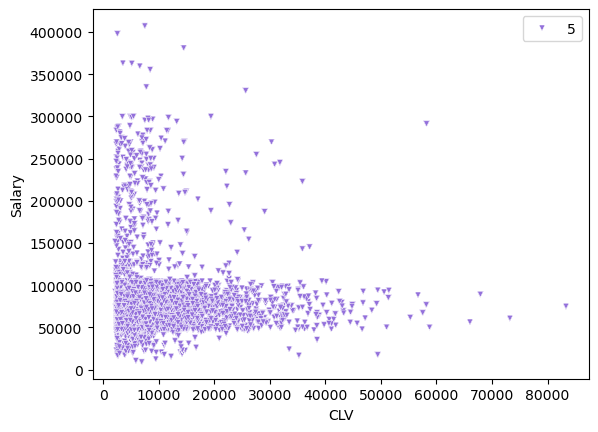

In [ ]:
sns.scatterplot(x = 'CLV', y = 'Salary', data = df_limpio, size = 5, marker= 'v', color= 'mediumpurple'); 
# Compruebo si Salary y CLV, Province o Education pueden tener relación para aplicar IterativeImputer o KNNI. 
# Pero no se ve ninguna correlación entre las variables, dejo comprobación solo de la correlación entre Salary y CLV.

VISUALIZACIÓN

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [26]:
df_vuelos_mes = df_limpio.groupby('Month')['Flights Booked'].sum().reset_index()
df_vuelos_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


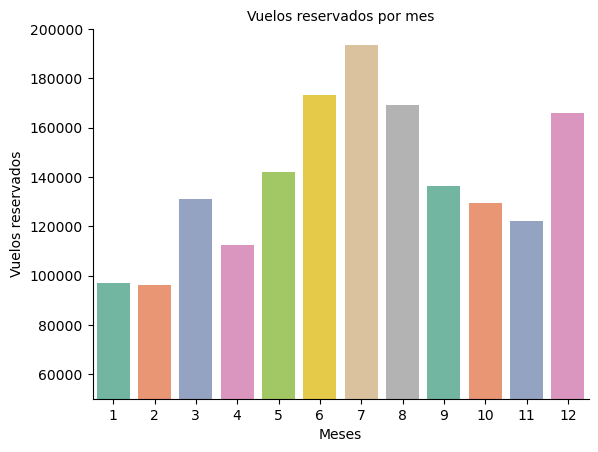

In [36]:
sns.barplot(x='Month', y='Flights Booked', data=df_vuelos_mes, palette='Set2')
plt.ylim([50000, 200000])
plt.xlabel('Meses') 
plt.ylabel('Vuelos reservados')
plt.title('Vuelos reservados por mes', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False);


Interpretación: este gráfico está basado en los datos de 2017 y 2018, lo cual nos da  una  consistencia mayor que si fuera solo un año. Se aprecia que durante los primeros meses del año se mantiene un número de vuelos más bien tirando a bajo, a excepción de marzo. Aumentan entre mayo y septiembre coincidiendo con el buen tiempo y especialmente elevados durante los meses de junio, julio y agosto, cuando más personas están de vacaciones. A continuación descienden ligeramente y vuelven a aumentar en diciembre, coincidiendo con las navidades, época en la que suele haber un incremento de viajes y desplazamientos.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

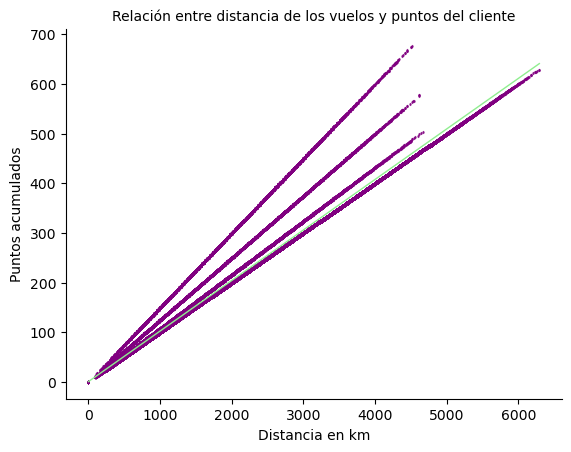

In [35]:
sns.regplot(x = 'Distance', y = 'Points Accumulated', data = df_limpio, marker= 'd', scatter_kws={'color': 'purple', 's': 1}, line_kws={'color': 'lightgreen', 'linewidth': 1})
plt.xlabel('Distancia en km') #Canadá usa el sistema métrico decimal para medir distancias
plt.ylabel('Puntos acumulados')
plt.title('Relación entre distancia de los vuelos y puntos del cliente', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False);

Interpretación: existe una clara correlación entre la distancia y los puntos acumulados, a mayor distancia recorrida en vuelos mayor es el número de puntos acumulados por el cliente.

In [32]:
df_limpio.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type'],
      dtype='object')

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [34]:
df_clientes_provincia = df_limpio.groupby('Province')['Loyalty Number'].nunique().reset_index()


In [139]:
df_clientes_provincia

,Province,Loyalty Number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


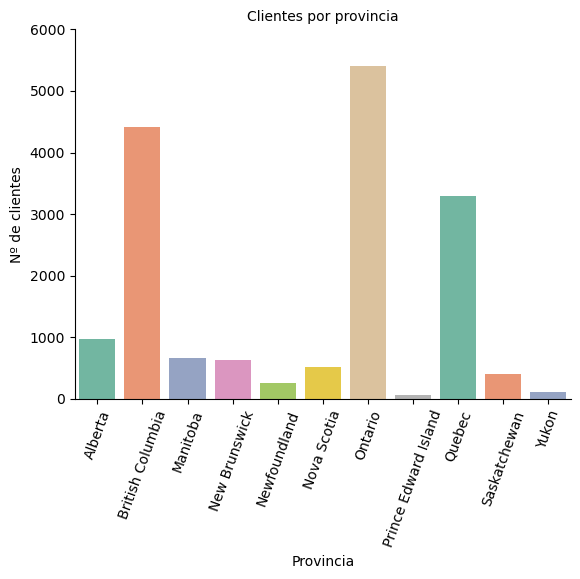

In [43]:
sns.barplot(x='Province', y='Loyalty Number', data=df_clientes_provincia, palette='Set2')
plt.xticks(rotation=70)
plt.ylim([0, 6000])
plt.xlabel('Provincia') 
plt.ylabel('Nº de clientes')
plt.title('Clientes por provincia', fontsize = 10)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False);